## "Distinct chromosomal niches in the genome of S. cerevisiae provide the background for genomic innovation and shape the fate of gene duplicates"
### Supporting R Code

### Loading Libraries

In [19]:
library(partykit)
library(gplots)
library(rpart)
library(rpart.plot)
library(MASS)
library(stats)
library(randomForest)
library(ggfortify)
library(ggplot2)
library(RColorBrewer)
library(arules)
library(arulesViz)
library(knitr)
library(gProfileR)
library(multcomp)
library(NbClust)
library(beanplot)
library(ggpubr)
library(ggtext)
library(ggrepel)

Warning message:
"package 'partykit' was built under R version 4.0.5"
Loading required package: grid

Loading required package: libcoin

Warning message:
"package 'libcoin' was built under R version 4.0.5"
Loading required package: mvtnorm

Warning message:
"package 'mvtnorm' was built under R version 4.0.5"

Attaching package: 'gplots'


The following object is masked from 'package:stats':

    lowess


Warning message:
"package 'rpart' was built under R version 4.0.5"
Warning message:
"package 'rpart.plot' was built under R version 4.0.5"
Warning message:
"package 'MASS' was built under R version 4.0.5"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.

Warning message:
"package 'ggfortify' was built under R version 4.0.5"
Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 4.0.5"

Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin


Warning message:
"package 'arul

### Genome Segmentation
In the following we create a "domainogram" plot from the SSD/WGD clusters. SSD(red), WGD(green), Complement(grey).

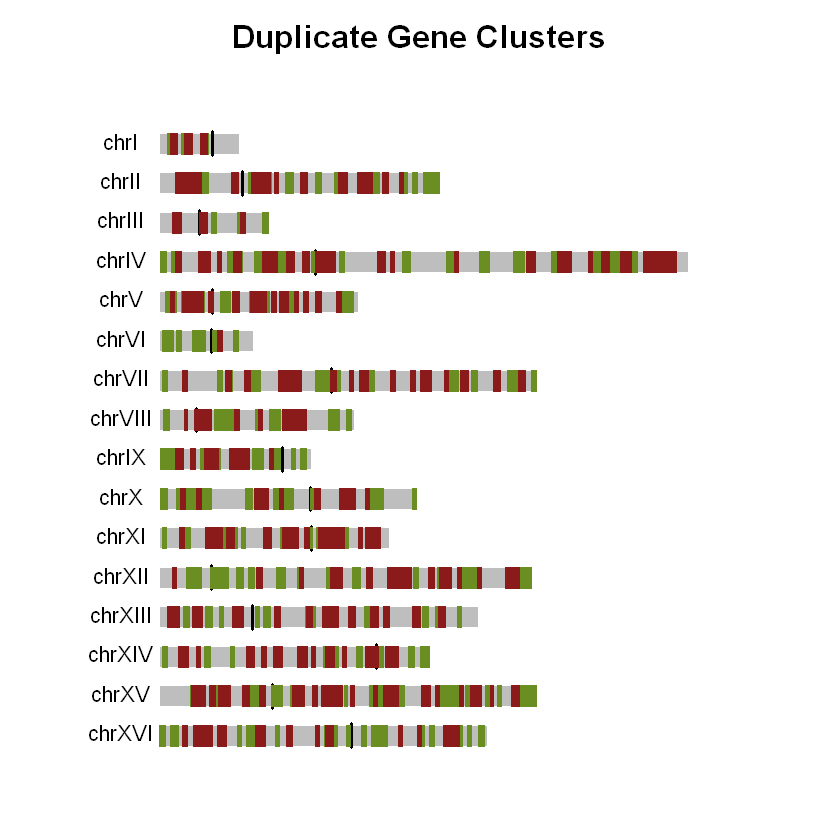

In [16]:
geneCoords<-read.delim("files/sacCer2_gene_coordinates.bed", header=T, sep="\t")
geneCoords3D<-read.delim("files/sacCer2_3D_gene_coordinates.bed", header=T, sep="\t")
ssdclusters<-read.delim("files/sacCer2_SSD_clusters.bed", header=F, sep="\t")
wgdclusters<-read.delim("files/sacCer2_WGD_clusters.bed", header=F, sep="\t")
complementclusters<-read.delim("files/sacCer2_Complement_clusters.bed", header=T, sep="\t")
#
source("R-functions/yeastgenomeplot.R")
chromosomes<-read.table("files/saccer2_R.genome")[,1:4]
# Assigning different scores to SSD/WGD for color representation
ssdclusters[,4]<-3
wgdclusters[,4]<--3
# joining two types of clusters in one table
bothssdwgdclusters<-rbind(ssdclusters, wgdclusters)
# Selecting large clusters for representation
i<-which(bothssdwgdclusters[,3]-bothssdwgdclusters[,2]>10000)
yeast.genome.plot(chromosomes, bothssdwgdclusters[i,], "Duplicate Gene Clusters", "firebrick4", "olivedrab")


### Distances on the same chromosome
Difference in distances on the same chromosome

Warning message:
"Removed 942 rows containing non-finite values (stat_boxplot)."
Warning message:
"Removed 942 rows containing non-finite values (stat_compare_means)."


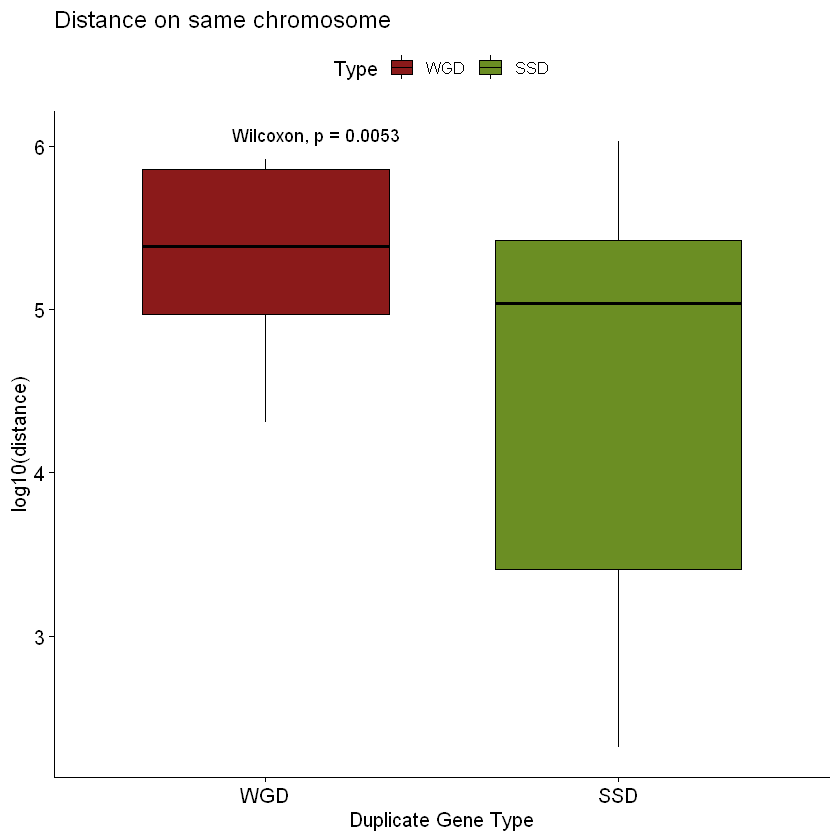

In [20]:
completedata<-read.delim("files/Yeast_GeneDuplicates_FullComparisons.tsv", header=T, sep="\t")
my_comparisons <- list(c("SSD", "WGD"))
completedata$logdist<-log10(completedata$dist)
bplot<-ggboxplot(completedata, x = "Type", y = "logdist", fill="Type", title="Distance on same chromosome", palette = c("firebrick4",  "olivedrab"))+ stat_compare_means() + labs(x="Duplicate Gene Type", y="log10(distance)")
bplot


### Distribution on same/different chromosome


      
       SSD WGD
  DIFF 423 518
  SAME  86  27

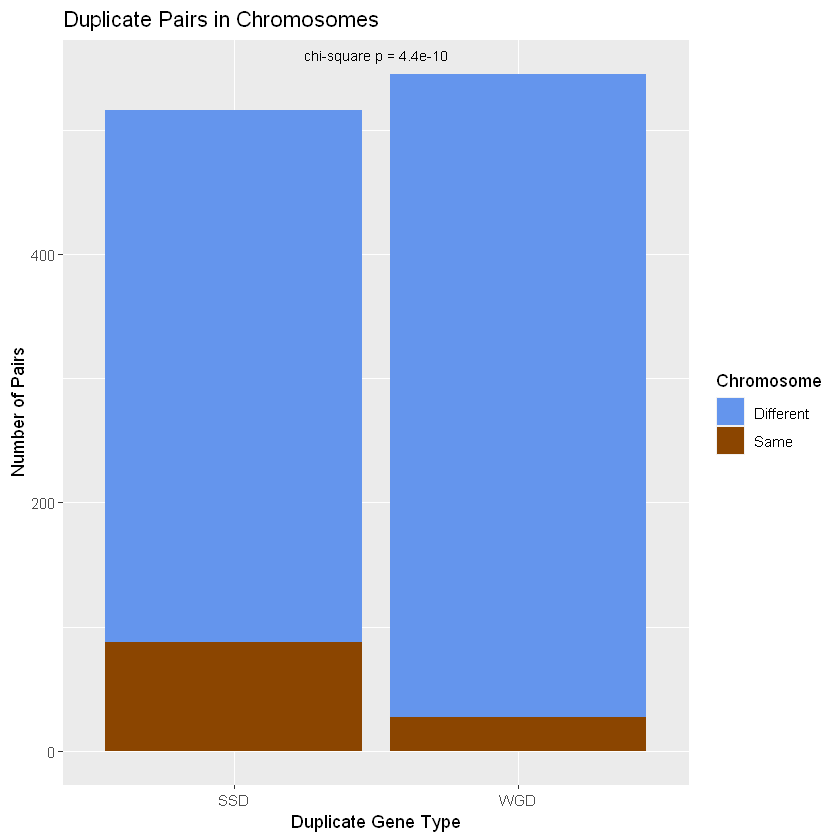

In [24]:
fdata<-read.delim("files/Yeast_GeneDuplicates_FullComparisons.tsv", header=T, sep="\t")
table(fdata$Chrom_Dist, fdata$Type)
df2<-data.frame("GeneType"=c(rep("SSD",2), rep("WGD",2)), "Chromosome"=rep(c("Same", "Different"),2), "Number of Pairs"=c(88,428,27,518))
ggplot(data=df2, aes(x=GeneType, y=Number.of.Pairs, fill=Chromosome)) +
geom_bar(stat="identity") + scale_fill_manual(values = c("cornflowerblue","darkorange4")) + labs(title = "Duplicate Pairs in Chromosomes", x="Duplicate Gene Type", y = "Number of Pairs") + geom_text(label="chi-square p = 4.4e-10", x = 1.5, y = 560, size = 3)
